In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Daten einlesen

In [2]:
USAhousing = pd.read_csv('USA_Housing.csv')

In [3]:
USAhousing.head()

Avg. Area Income  Avg. Area House Age  Avg. Area Number of Rooms  \
0      79545.458574             5.682861                   7.009188   
1      79248.642455             6.002900                   6.730821   
2      61287.067179             5.865890                   8.512727   
3      63345.240046             7.188236                   5.586729   
4      59982.197226             5.040555                   7.839388   

   Avg. Area Number of Bedrooms  Area Population         Price  \
0                          4.09     23086.800503  1.059034e+06   
1                          3.09     40173.072174  1.505891e+06   
2                          5.13     36882.159400  1.058988e+06   
3                          3.26     34310.242831  1.260617e+06   
4                          4.23     26354.109472  6.309435e+05   

                                             Address  
0  208 Michael Ferry Apt. 674\nLaurabury, NE 3701...  
1  188 Johnson Views Suite 079\nLake Kathleen, CA...  
2  9127 Elizabeth Stravenue\nDanieltown, WI 06482...  
3                          USS Barnett\nFPO AP 44820  
4                         USNS Raymond\nFPO AE 09386

In [4]:
USAhousing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


In [5]:
USAhousing.describe()

Avg. Area Income  Avg. Area House Age  Avg. Area Number of Rooms  \
count       5000.000000          5000.000000                5000.000000   
mean       68583.108984             5.977222                   6.987792   
std        10657.991214             0.991456                   1.005833   
min        17796.631190             2.644304                   3.236194   
25%        61480.562388             5.322283                   6.299250   
50%        68804.286404             5.970429                   7.002902   
75%        75783.338666             6.650808                   7.665871   
max       107701.748378             9.519088                  10.759588   

       Avg. Area Number of Bedrooms  Area Population         Price  
count                   5000.000000      5000.000000  5.000000e+03  
mean                       3.981330     36163.516039  1.232073e+06  
std                        1.234137      9925.650114  3.531176e+05  
min                        2.000000       172.610686  1.593866e+04  
25%                        3.140000     29403.928702  9.975771e+05  
50%                        4.050000     36199.406689  1.232669e+06  
75%                        4.490000     42861.290769  1.471210e+06  
max                        6.500000     69621.713378  2.469066e+06

In [6]:
USAhousing.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')

### Visualisierung

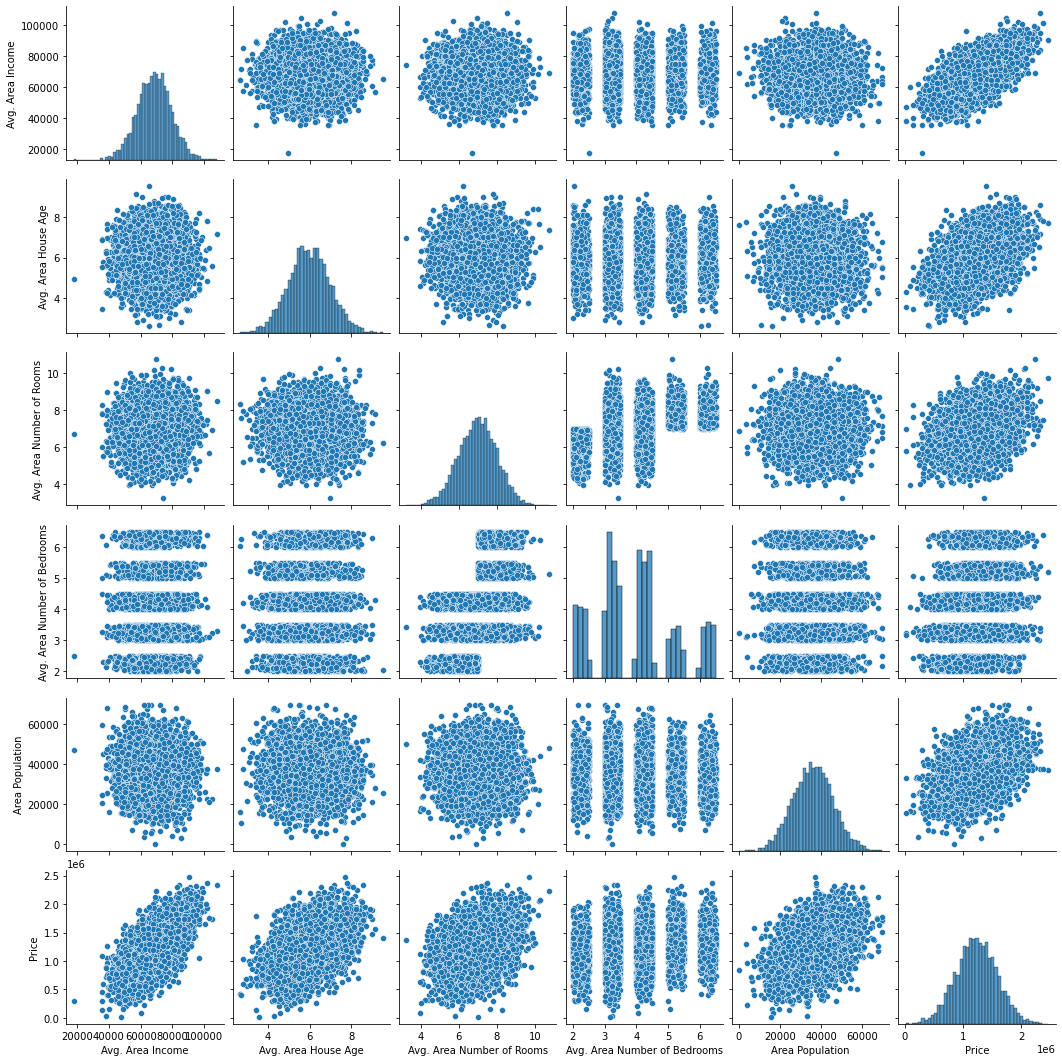

In [7]:
sns.pairplot(USAhousing)

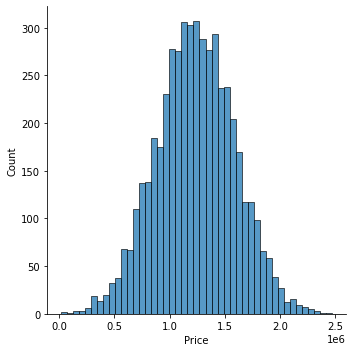

In [9]:
sns.displot(USAhousing['Price'])

<AxesSubplot:>

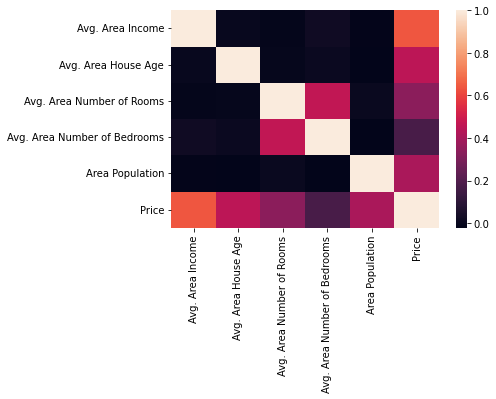

In [10]:
sns.heatmap(USAhousing.corr())

=> Keine Korrelation zwischen `Avg. Area Income` und `Avg. Area House Age`. <br>
Jedoch Korrelationen bei `Price` und `Avg Area Income`, `Avg Area House Age` usw.
<br>
Weitere Korrelation bei `Avg. Area Number of Bedrooms` und `Avg. Area Number of Rooms` => Je mehr Zimmer ein Haus hat, desto mehr Schlafzimmer

# Ein lineares Regressionsmodell trainieren

Wir können nun damit beginnen unser lineares Regressionsmodell zu trainieren. Dazu müssen wir unsere Daten zuerst in ein x-Array (mit den Features) und ein y-Array (mit der Zielvariablen) <strong>aufteilen</strong>. In diesem Fall wollen wir den <strong>Preis (en. price) vorhersagen</strong>, also ist diese Spalte unsere <strong>Zielvariable</strong>. Wir lassen außerdem die Adress-Spalte außen vor, da sie nur Textinformation enthält, die dem Modell nichts nützt.

### x und y Arrays

In [11]:
# X = Feature Vector
X = USAhousing[['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
               'Avg. Area Number of Bedrooms', 'Area Population']]
# Y = Label (Zielvariabel)
y = USAhousing['Price']

## Trainings- und Testprobe

Als nächstes sollten wir die Daten in einen Teil zum Trainieren und einen Teil zum Testen des Modells aufteilen. Nachdem wir unser Modell mit der Trainingsprobe trainiert haben können wir die Qualität mit der Testprobe überprüfen.

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.4, random_state=101)

In [14]:
from sklearn.linear_model import LinearRegression

In [15]:
lm = LinearRegression() # Linear Regression Modell

In [16]:
lm.fit(X_train, y_train)

LinearRegression()

In [17]:
print(lm.intercept_)  # Y-Achsenabschnitt

-2640159.7968526953


In [18]:
lm.coef_  # Koeffizienten der einzelnen Spalten

array([2.15282755e+01, 1.64883282e+05, 1.22368678e+05, 2.23380186e+03,
       1.51504200e+01])

In [20]:
X.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population'],
      dtype='object')

In [21]:
coeff_df = pd.DataFrame(lm.coef_, X.columns, columns=['Koeffizienten'])
# Data, Index (Zeilen Namen), Spalte

In [22]:
coeff_df

Koeffizienten
Avg. Area Income                  21.528276
Avg. Area House Age           164883.282027
Avg. Area Number of Rooms     122368.678027
Avg. Area Number of Bedrooms    2233.801864
Area Population                   15.150420

`Avg. Area Income` => `21.528276` : Bedeutet, wenn man alle Feature konstant hält, dann Anstieg des Einkommen um 1 Einheit, steigt der Durchschnittspreis um 21.528276.
`Avg. Area House Age` => Wenn Alter das Haus um 1 Jahr ansteigt, dann steigt der Preis um 164883 Dollar (jedoch in der Realität falsch)

### Interpretation der Koeffizienten:

* Hält man alle anderen Features konstant dann wird ein Anstieg des **Avg. Area Income** um 1 Einheit mit einem Anstieg von 21.52\$ asoziiert
* Hält man alle anderen Features konstant dann wird ein Anstieg des **Avg. Area House Age** um 1 Einheit mit einem Anstieg von 164883.28\$ asoziiert
* Hält man alle anderen Features konstant dann wird ein Anstieg des **Avg. Area Number of Rooms** um 1 Einheit mit einem Anstieg von 122368.67\$ asoziiert
* Hält man alle anderen Features konstant dann wird ein Anstieg des **Avg. Area Number of Bedrooms** um 1 Einheit mit einem Anstieg von 2233.80\$ asoziiert
* Hält man alle anderen Features konstant dann wird ein Anstieg des **Area Population** um 1 Einheit mit einem Anstieg von 15.15\$ asoziiert

Ergibt das Sinn? Wahrscheinlich nicht sehr viel, da dies ausgedachte Daten sind. Für echte Daten bietet sich der [Boston Datensatz](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_boston.html) an:

    from sklearn.datasets import load_boston
    boston = load_boston()
    print(boston.DESCR)
    boston_df = boston.data

In [23]:
from sklearn.datasets import load_boston

In [24]:
boston = load_boston()

D:\Users\Hai\Anaconda3\envs\myenv\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this case special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California hou

In [25]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [26]:
boston_df = boston.data

In [27]:
boston_df

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]])

## Vorhersage des Modells

Lassen wir nun einige Vorhersagen aus unserer Testprobe treffen und Überprüfen wie gut unser Modell ist.

In [28]:
predictions = lm.predict(X_test)

In [29]:
predictions

array([1260960.70567627,  827588.75560329, 1742421.24254344, ...,
        372191.40626917, 1365217.15140898, 1914519.5417888 ])

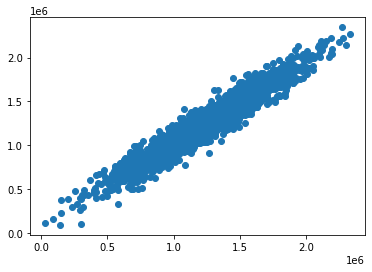

In [30]:
plt.scatter(y_test, predictions)

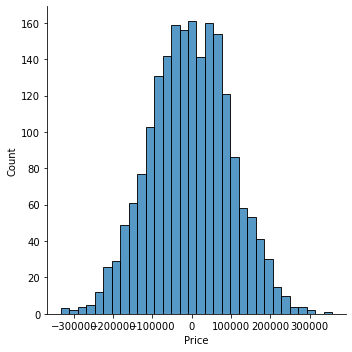

In [31]:
sns.displot((y_test-predictions))

Normalverteilung (gut)

## Regressions Auswertungsmetriken

Hier sind drei der üblichen Metriken zur Auswertung von Regressions Aufgaben:

**Mean Absolute Error** (MAE) ist der Durchschnitt des absoluten Werts der Errors:

$$\frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|$$

**Mean Squared Error** (MSE) ist der Durchschnitt der quadrierten Errors:

$$\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$

**Root Mean Squared Error** (RSME) ist die Quadratwurzel des Durchschnitts der quardrierten Errors:

$$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$

Diese Metriken vergleichen:

* **MAE** ist am leichtesten zu verstehen, da sie den durchschnittlichen Error angibt
* **MSE** ist verbreiteter, da MSE die größeren Errors "bestraft", was in der realen Welt nützlich ist
* **RSME** ist sogar noch verbreiteter als MSE, da RMSE in "y" Einheiten interpretierbar ist

Alle drei sind sogenannte *loss functions*, da wir sie minimieren wollen!

In [32]:
from sklearn import metrics

In [33]:
metrics.mean_absolute_error(y_test, predictions)

82288.22251914944

In [34]:
metrics.mean_squared_error(y_test, predictions)

10460958907.20898

In [35]:
np.sqrt(metrics.mean_squared_error(y_test, predictions))

102278.82922290899